# 机器学习纳米学位
## 非监督学习
## 项目 3: 创建用户分类

欢迎来到机器学习工程师纳米学位的第三个项目！在这个 notebook 文件中，有些模板代码已经提供给你，但你还需要实现更多的功能来完成这个项目。除非有明确要求，你无须修改任何已给出的代码。以**'练习'**开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以 **'TODO'** 标出。请仔细阅读所有的提示！

除了实现代码外，你还**必须**回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。

>**提示：**Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown 可以通过双击进入编辑模式。

## 开始

在这个项目中，你将分析一个数据集的内在结构，这个数据集包含很多客户真对不同类型产品的年度采购额（用**金额**表示）。这个项目的任务之一是如何最好地描述一个批发商不同种类顾客之间的差异。这样做将能够使得批发商能够更好的组织他们的物流服务以满足每个客户的需求。

这个项目的数据集能够在[UCI机器学习信息库](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers)中找到.因为这个项目的目的，分析将不会包括 'Channel' 和 'Region' 这两个特征——重点集中在6个记录的客户购买的产品类别上。

运行下面的的代码单元以载入整个客户数据集和一些这个项目需要的 Python 库。如果你的数据集载入成功，你将看到后面输出数据集的大小。

In [1]:
# 检查你的Python版本
from sys import version_info
if version_info.major != 3:
    raise Exception('请使用Python 3.x 来完成此项目')

In [2]:
# 引入这个项目需要的库
import numpy as np
import pandas as pd
import visuals as vs
from IPython.display import display # 使得我们可以对DataFrame使用display()函数

# 设置以内联的形式显示matplotlib绘制的图片（在notebook中显示更美观）
%matplotlib inline
# 高分辨率显示
# %config InlineBackend.figure_format='retina'

# 载入整个客户数据集
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## 分析数据
在这部分，你将开始分析数据，通过可视化和代码来理解每一个特征和其他特征的联系。你会看到关于数据集的统计描述，考虑每一个属性的相关性，然后从数据集中选择若干个样本数据点，你将在整个项目中一直跟踪研究这几个数据点。

运行下面的代码单元给出数据集的一个统计描述。注意这个数据集包含了6个重要的产品类型：**'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**和 **'Delicatessen'**。想一下这里每一个类型代表你会购买什么样的产品。

In [3]:
# 显示数据集的一个描述
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### 练习: 选择样本
为了对客户有一个更好的了解，并且了解代表他们的数据将会在这个分析过程中如何变换。最好是选择几个样本数据点，并且更为详细地分析它们。在下面的代码单元中，选择**三个**索引加入到索引列表`indices`中，这三个索引代表你要追踪的客户。我们建议你不断尝试，直到找到三个明显不同的客户。

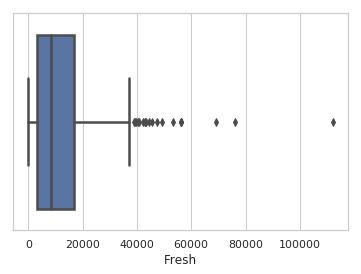

In [4]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["Fresh"],linewidth=2.5)

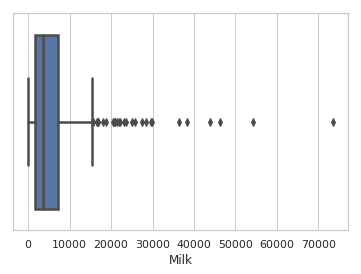

In [5]:
ax = sns.boxplot(x=data["Milk"],linewidth=2.5)

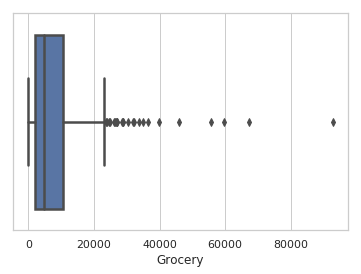

In [6]:
ax = sns.boxplot(x=data["Grocery"],linewidth=2.5)

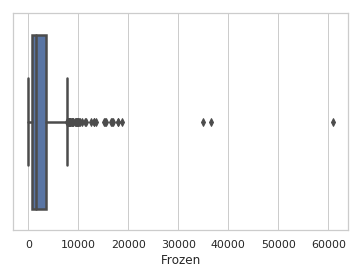

In [7]:
ax = sns.boxplot(x=data["Frozen"],linewidth=2.5)

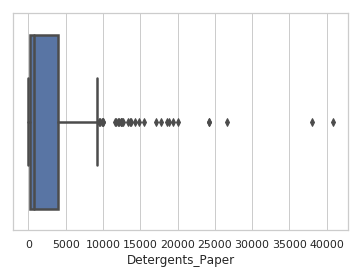

In [8]:
ax = sns.boxplot(x=data["Detergents_Paper"],linewidth=2.5)

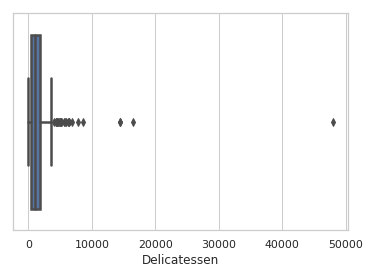

In [9]:
ax = sns.boxplot(x=data["Delicatessen"],linewidth=2.5)

In [10]:
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [11]:
# TODO：从数据集中选择三个你希望抽样的数据点的索引
indices = [6, 2,  3]

# 为选择的样本建立一个DataFrame
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12126,3199,6975,480,3140,545
1,6353,8808,7684,2405,3516,7844
2,13265,1196,4221,6404,507,1788


### 问题 1
在你看来你选择的这三个样本点分别代表什么类型的企业（客户）？对每一个你选择的样本客户，通过它在每一种产品类型上的花费与数据集的统计描述进行比较，给出你做上述判断的理由。


**提示：** 企业的类型包括超市、咖啡馆、零售商以及其他。注意不要使用具体企业的名字，比如说在描述一个餐饮业客户时，你不能使用麦当劳。

**回答:** 
- 第一家企业购买的Fresh为和Detegents_Paper比较多且数据大于50%的数值，Frozen和Deli比较少，其中Frozen低于25%，Deli低于50%的数据，所以这个客户不会是超市、零售商或咖啡馆，最有可能的是其他，原因如下：
  - 熟食是超市销售的主力商品之一，不会太少（大于50%），不是超市
  - 零售商一般购买大致相当数量的物品，各个商品数量不会较平均值相差太大，不会是零售商
  - 咖啡馆一般需要很多牛奶和清洁纸，和熟食，不会是咖啡馆
- 第二家企业，所有商品都购买的比较平均且数量颇多，Fresh小于50%的数据，Frozen和Detergents_Paper多于50%的数据，Grocery、Milk和Delicatessen大于75%的数据，比较可能是零售商，原因如下：
  - 新鲜食物太少，不是超市
  - 冷冻食品太多，日用杂货太多，不是咖啡馆
- 第三家企业，新鲜食品购买的最多，多于50%，但是清洁纸买的非常少少于50%，很有可能是超市，原因如下：
  - 清洁纸太少，不会是咖啡店
  - 新鲜食品太多，零售商不会这么囤货，不是零售商

### 练习: 特征相关性
一个有趣的想法是，考虑这六个类别中的一个（或者多个）产品类别，是否对于理解客户的购买行为具有实际的相关性。也就是说，当用户购买了一定数量的某一类产品，我们是否能够确定他们必然会成比例地购买另一种类的产品。有一个简单的方法可以检测相关性：我们用移除了某一个特征之后的数据集来构建一个监督学习（回归）模型，然后用这个模型去预测那个被移除的特征，再对这个预测结果进行评分，看看预测结果如何。

在下面的代码单元中，你需要实现以下的功能：
 - 使用 `DataFrame.drop` 函数移除数据集中你选择的不需要的特征，并将移除后的结果赋值给 `new_data` 。
 - 使用 `sklearn.model_selection.train_test_split` 将数据集分割成训练集和测试集。
   - 使用移除的特征作为你的目标标签。设置 `test_size` 为 `0.25` 并设置一个 `random_state` 。
 
 
 - 导入一个 DecisionTreeRegressor （决策树回归器），设置一个 `random_state`，然后用训练集训练它。
 - 使用回归器的 `score` 函数输出模型在测试集上的预测得分。

In [12]:
# TODO：为DataFrame创建一个副本，用'drop'函数丢弃一个特征# TODO： 
new_data = data.drop(['Delicatessen'], axis = 1)
label = pd.DataFrame(data['Delicatessen'])
# TODO：使用给定的特征作为目标，将数据分割成训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, label, test_size = 0.25, random_state = 1)

# TODO：创建一个DecisionTreeRegressor（决策树回归器）并在训练集上训练它
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
# TODO：输出在测试集上的预测得分
score = regressor.score(X_test, y_test)
print('The test score is {}'.format(score))


The test score is -10.586494060817218


### 问题 2
你尝试预测哪一个特征？预测的得分是多少？这个特征对于区分用户的消费习惯来说必要吗？为什么？  
**提示：** 决定系数（coefficient of determination），$R^2$ 结果在0到1之间，1表示完美拟合，一个负的 $R^2$ 表示模型不能够拟合数据。

**回答:**
 
- Milk: The test score is 0.3725574520523447
- Fresh: The test score is -1.138971802072886
- Grocery: The test score is 0.7952931717149178
- Frozen: The test score is -0.6965500183018567
- Detergents_Paper: The test score is 0.763468783138608
- Delicatessen: The test score is -10.586494060817218

我把所有6个特征全部算了出来，可以看出Fresh、Frozen、Delicatessen不拟合模型，所以这三个特征对于模型的走势完全不拟合，也就是说这三个特征作为预测值时，其它特征无法推测出来，无相关性。但是，不能剔除，这三个特征在预测其他模型时可能会发挥作用。最好的最法是吧这些特征融合到其它特征中。对于其其它分数较高的来说，$R^2$ score越高证明一个特征越容易被其他特征预测，它带来的"原创信息"就相对来说较少，所以必要性就低．

### 可视化特征分布
为了能够对这个数据集有一个更好的理解，我们可以对数据集中的每一个产品特征构建一个散布矩阵（scatter matrix）。如果你发现你在上面尝试预测的特征对于区分一个特定的用户来说是必须的，那么这个特征和其它的特征可能不会在下面的散射矩阵中显示任何关系。相反的，如果你认为这个特征对于识别一个特定的客户是没有作用的，那么通过散布矩阵可以看出在这个数据特征和其它特征中有关联性。运行下面的代码以创建一个散布矩阵。

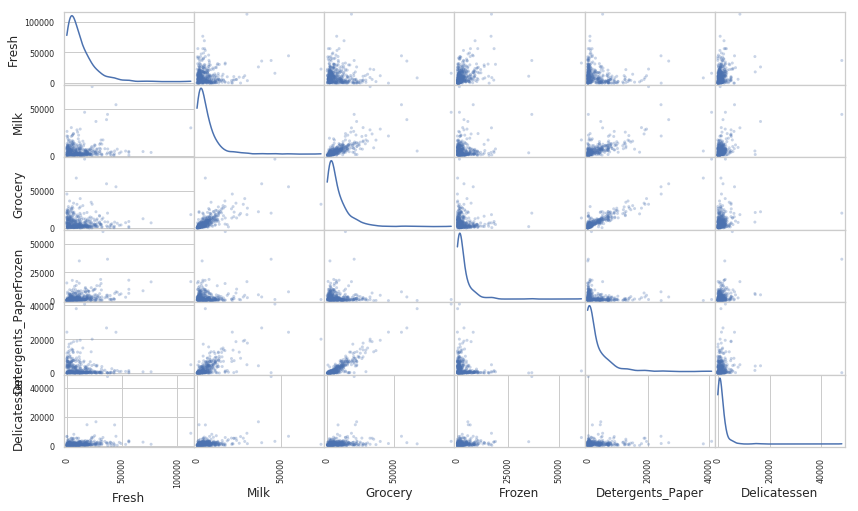

In [13]:
# 对于数据中的每一对特征构造一个散布矩阵
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


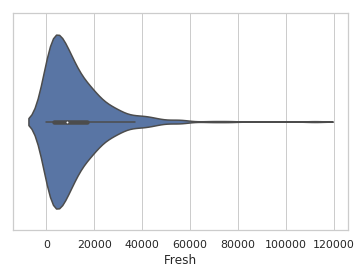

In [14]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.violinplot(x="Fresh", data=data)

### 问题 3
这里是否存在一些特征他们彼此之间存在一定程度相关性？如果有请列出。这个结果是验证了还是否认了你尝试预测的那个特征的相关性？这些特征的数据是怎么分布的？

**提示：** 这些数据是正态分布（normally distributed）的吗？大多数的数据点分布在哪？

**回答:**
Fresh、Frozen、Delicatessen这三个特征相对于其他特征，从上图中看不到明显的相关性。而其它特征相互之间则表现出了一定的线性相关。具体存在强相关性的特征如下：
- Grocery\Milk
- Detergents_paper\Milk
- Detergents_paper\Grocery
- 所有的强相关pairs，都是正线性相关

** 基本符合上面得分最高的三个特征，依据得分排名如下：Grocery、Detergents_paper 和 Milk。Milk在上面可以看出，线性相关不如前面两个。

** 数据的分布：所有数据都是类正态分布，属于right skew， 也就是中位数大于均值，且大多数数据都分布在前10%，以Fresh为例，Freah大多分布在40000以下，但是数据一直到120000

NB:数据并非正态分布, 一个典型的特征，就是数据的分布并不对称，否则应该存在一些负值的特征。这里的数据分布更像是log-normal。

偏态（skewness）是对数据是否对称分布的不错的考量。除了画图观察，我们可以通过scipy.stats.skew()来测量数据的偏态：

- 结果为0时，代表对称分布
- 结果〉0时，代表正偏态（也叫右偏态），比如我们目前的数据。

偏度分为两种：

- 负偏态或左偏态：左侧的尾部更长，分布的主体集中在右侧。
- 正偏态或右偏态：右侧的尾部更长，分布的主体集中在左侧。

## 数据预处理
在这个部分，你将通过在数据上做一个合适的缩放，并检测异常点（你可以选择性移除）将数据预处理成一个更好的代表客户的形式。预处理数据是保证你在分析中能够得到显著且有意义的结果的重要环节。

### 练习: 特征缩放
如果数据不是正态分布的，尤其是数据的平均数和中位数相差很大的时候（表示数据非常歪斜）。这时候通常用一个[非线性的缩放](https://github.com/czcbangkai/translations/blob/master/use_of_logarithms_in_economics/use_of_logarithms_in_economics.pdf)是很合适的，[（英文原文）](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) — 尤其是对于金融数据。一种实现这个缩放的方法是使用 [Box-Cox 变换](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html)，这个方法能够计算出能够最佳减小数据倾斜的指数变换方法。一个比较简单的并且在大多数情况下都适用的方法是使用自然对数。

在下面的代码单元中，你将需要实现以下功能：
 - 使用 `np.log` 函数在数据 `data` 上做一个对数缩放，然后将它的副本（不改变原始data的值）赋值给 `log_data`。 
 - 使用 `np.log` 函数在样本数据 `samples` 上做一个对数缩放，然后将它的副本赋值给 `log_samples`。

做的很好。很多算法都会假设数据是接近正态分布的，而缩放是一种常见的让数据分布变得对称的方法。另外，像K-means这样的聚类算法，是基于距离来进行划分，因此我们也会想要对数据进行缩放，以避免被某个显著的特征所影响。

关于数据缩放还有其他的办法，比如说，另外一种数据缩放的办法是Box-Cox转化：
``` python
from scipy.stats import boxcox
x_boxcox, _ = boxcox(x)
```
参考（英文）: http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html

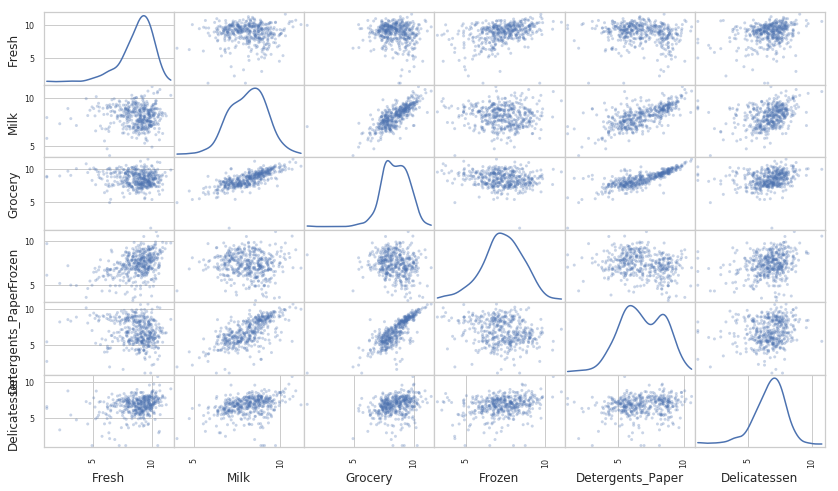

In [15]:
# TODO：使用自然对数缩放数据
log_data = np.log(data)

# TODO：使用自然对数缩放样本数据
log_samples = np.log(samples)

# 为每一对新产生的特征制作一个散射矩阵
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### 观察
在使用了一个自然对数的缩放之后，数据的各个特征会显得更加的正态分布。对于任意的你以前发现有相关关系的特征对，观察他们的相关关系是否还是存在的（并且尝试观察，他们的相关关系相比原来是变强了还是变弱了）。

运行下面的代码以观察样本数据在进行了自然对数转换之后如何改变了。

**异常值的检测与移除是很主观的。对于异常检测，有不同的指标，比如Peirce's criterion, Tukey’s test, 基于kurtosis的方法，等等。异常值可能会影响一些聚类算法，比如k-means, 此时，异常值是应该被移除的。我们有时候也会移除异常值以让数据分布更加趋向于正态分布。 但是，我们也并不希望过多的删除异常值，因为这会减少数据的数量。综合上面两点，在这里你选择移除了5个点是很合理的。**

In [16]:
# 展示经过对数变换后的样本数据
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.403107,8.070594,8.850088,6.173786,8.051978,6.300786
1,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
2,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853


### 练习: 异常值检测
对于任何的分析，在数据预处理的过程中检测数据中的异常值都是非常重要的一步。异常值的出现会使得把这些值考虑进去后结果出现倾斜。这里有很多关于怎样定义什么是数据集中的异常值的经验法则。这里我们将使用[ Tukey 的定义异常值的方法](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/)：一个异常阶（outlier step）被定义成1.5倍的四分位距（interquartile range，IQR）。一个数据点如果某个特征包含在该特征的 IQR 之外的特征，那么该数据点被认定为异常点。

在下面的代码单元中，你需要完成下面的功能：
 - 将指定特征的 25th 分位点的值分配给 `Q1` 。使用 `np.percentile` 来完成这个功能。
 - 将指定特征的 75th 分位点的值分配给 `Q3` 。同样的，使用 `np.percentile` 来完成这个功能。
 - 将指定特征的异常阶的计算结果赋值给 `step`。
 - 选择性地通过将索引添加到 `outliers` 列表中，以移除异常值。

**注意：** 如果你选择移除异常值，请保证你选择的样本点不在这些移除的点当中！
一旦你完成了这些功能，数据集将存储在 `good_data` 中。

## NB
把重复的numpy序列，排序然后剔除重复的数值，使用`np.unique`

`np.unique` - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.unique.html

计算numpy序列中，有多少重复出现的数值使用
``` python
from collections import Counter
outliers = [item for item, count in Counter(temp_index).items() if count > 1]
```
`Counter`- https://docs.python.org/3.5/library/collections.html

由于在np.append时，忘记把初始化的空temp_index放入循环，导致结果错误

In [17]:
temp_index  = []
outliers = []
# 对于每一个特征，找到值异常高或者是异常低的数据点
for feature in log_data.keys():
    
    # TODO: 计算给定特征的Q1（数据的25th分位点）
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: 计算给定特征的Q3（数据的75th分位点）
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: 使用四分位范围计算异常阶（1.5倍的四分位距）
    step = 1.5*(Q3-Q1)
    # 显示异常点
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    temp_index = np.append(temp_index, np.array(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index)).astype(int)
    
    
import numpy as np
from collections import Counter
outliers = [item for item, count in Counter(temp_index).items() if count > 1]

# 以下代码会移除outliers中索引的数据点, 并储存在good_data中
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [18]:
outliers

[65, 66, 128, 154, 75]

### 问题 4
请列出所有在多于一个特征下被看作是异常的数据点。这些点应该被从数据集中移除吗？为什么？把你认为需要移除的数据点全部加入到到 `outliers` 变量中。

**回答:**

[65, 66, 128, 154, 75] 这是所有在多于一个特征下被看做异常值的数据，这些数据应该被剔除。

举个例子：一个经销商，在一个区域内，这个区域需要的牛奶非常多，而冷鲜食品几乎没人买，那么这个经销商就和其他经销商的数据出现了非常大的差别。在预测的时候就和给预测叠加上噪音，所以应该去除。

所以说这些数据点是异常的点，另外在保证数据完整性的情况下，保留只在一个特征下出现的离群点，因为这些数据对全体预测的影响不会太大，有时候可能可以增加单个特征的特征度

## 特征转换
在这个部分中你将使用主成分分析（PCA）来分析批发商客户数据的内在结构。由于使用PCA在一个数据集上会计算出最大化方差的维度，我们将找出哪一个特征组合能够最好的描绘客户。

### 练习: 主成分分析（PCA）

既然数据被缩放到一个更加正态分布的范围中并且我们也移除了需要移除的异常点，我们现在就能够在 `good_data` 上使用PCA算法以发现数据的哪一个维度能够最大化特征的方差。除了找到这些维度，PCA 也将报告每一个维度的解释方差比（explained variance ratio）--这个数据有多少方差能够用这个单独的维度来解释。注意 PCA 的一个组成部分（维度）能够被看做这个空间中的一个新的“特征”，但是它是原来数据中的特征构成的。

在下面的代码单元中，你将要实现下面的功能：
 - 导入 `sklearn.decomposition.PCA` 并且将 `good_data` 用 PCA 并且使用6个维度进行拟合后的结果保存到 `pca` 中。
 - 使用 `pca.transform` 将 `log_samples` 进行转换，并将结果存储到 `pca_samples` 中。

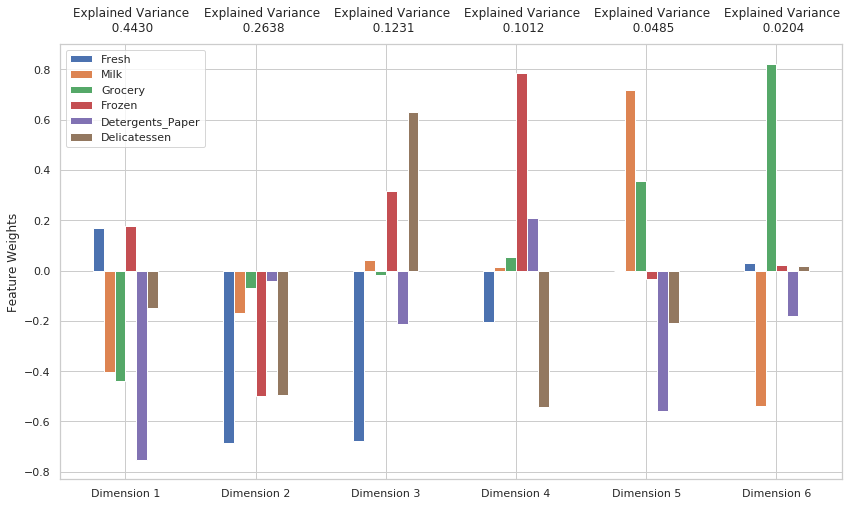

In [19]:
# TODO：通过在good data上进行PCA，将其转换成6个维度
from sklearn.decomposition import PCA
pca = PCA(n_components = 6, whiten = True)
pca = pca.fit(good_data)
# TODO：使用上面的PCA拟合将变换施加在log_samples上
pca_samples = pca.transform(log_samples)

# 生成PCA的结果图
pca_results = vs.pca_results(good_data, pca)

### 问题 5
数据的第一个和第二个主成分**总共**表示了多少的方差？ 前四个主成分呢？使用上面提供的可视化图像，从用户花费的角度来讨论前四个主要成分中每个主成分代表的消费行为并给出你做出判断的理由。

**提示：**
* 对每个主成分中的特征分析权重的正负和大小。
* 结合每个主成分权重的正负讨论消费行为。
* 某一特定维度上的正向增长对应正权特征的增长和负权特征的减少。增长和减少的速率和每个特征的权重相关。[参考资料：Interpretation of the Principal Components](https://onlinecourses.science.psu.edu/stat505/node/54)

**回答:**
数据的第一个和第二个主成份总共表示了(0.4430+0.2638=0.6968)0.6968的方差, 前四个主成份总共表示了（0.4430+0.2638+0.1231+0.1012=0.9211）0.9211的方差。 

注：这里所说的增长为权重增长，减少为权重减少

第一个主成分
>第一个主成份解释了0.4430的权重，这个主成份与Detergents_paper的增长成反比（权重-0.5以下），所以这个主成份对于Detergents_paper非常不需要，从这个主成份对于清洁用纸的排斥程度来看，这是一个不需要过多清洁的场所。

第二个主成分
>第二个主成份解释了0.2638的权重，这个主成份与Fresh和Frozen的增长成反比，所以这个客户对于新鲜和冷冻的商品不是很需要。

第三个主成分
>第三个主成份解释了0.1231的权重，这个主成份与Fresh的增长成反比，与Frozen的增长成正比，所以这个客户对于新鲜商品不需要，但是需要冷冻商品。

第四个主成分
>第四个主成份解释了0.1012的权重，这个主成份与Frozen的增长成反比，与Delicatessen的增长成正比，所以这个客户对于冷冻的商品不需要，但是需要大量熟食。

很好的解释，并且你注意到了第三维度和第四维度存在的的符号相反的权重。

PCA后的每一个主要成分，是由原数据各个特征加上不同比重构成的。首要成分是最能够解释原数据的方差的，也就是所谓的explained variance。举例来说，在这个项目中，第一个主要成分在Detergents_Paper, Grocery和Milk上有很大的比重，并且解释了最多的方差。排除掉第一个主要成分（及其所解释的方差），第二个主要成份解释了最多的剩余的方差。以此类推，第三个成分是在排除了第二个成分的基础上，最能够解释剩余方差的。

对于PCA主成分的分析，通常我们更关心的，是feature weight的绝对大小, 但是第三和第四维度的存在一些相对比重很高但是符号相反的权重（比如第三维的Fresh与Delicatessen），它们表示了一种负相关的关系。比如对于第三维度来说，如果用客户购买很多Fresh， 那么这个客户就会购买很少的Delicatessen。反之也成立：如果客户购买很多Delicatessen，那么Fresh的购买就会减小。

关于PCA的主要成分，在论坛曾经有过讨论, 这里给你提供一些额外的参考：
http://discussions.youdaxue.com/t/pca-explained-variance/7098
https://discussions.youdaxue.com/t/pca/33415
（英文）https://onlinecourses.science.psu.edu/stat505/node/54

### 观察
运行下面的代码，查看经过对数转换的样本数据在进行一个6个维度的主成分分析（PCA）之后会如何改变。观察样本数据的前四个维度的数值。考虑这和你初始对样本点的解释是否一致。

In [20]:
# 展示经过PCA转换的sample log-data
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.5292,0.1597,-1.1709,-0.5267,-0.6853,0.2397
1,-0.8830,-0.9717,1.1746,-0.5329,-0.5574,-0.6809
2,0.5417,-0.8538,0.4824,0.4048,-0.9727,1.4002


### 练习：降维
当使用主成分分析的时候，一个主要的目的是减少数据的维度，这实际上降低了问题的复杂度。当然降维也是需要一定代价的：更少的维度能够表示的数据中的总方差更少。因为这个，**累计解释方差比（cumulative explained variance ratio）**对于我们确定这个问题需要多少维度非常重要。另外，如果大部分的方差都能够通过两个或者是三个维度进行表示的话，降维之后的数据能够被可视化。

在下面的代码单元中，你将实现下面的功能：
 - 将 `good_data` 用两个维度的PCA进行拟合，并将结果存储到 `pca` 中去。
 - 使用 `pca.transform` 将 `good_data` 进行转换，并将结果存储在 `reduced_data` 中。
 - 使用 `pca.transform` 将 `log_samples` 进行转换，并将结果存储在 `pca_samples` 中。

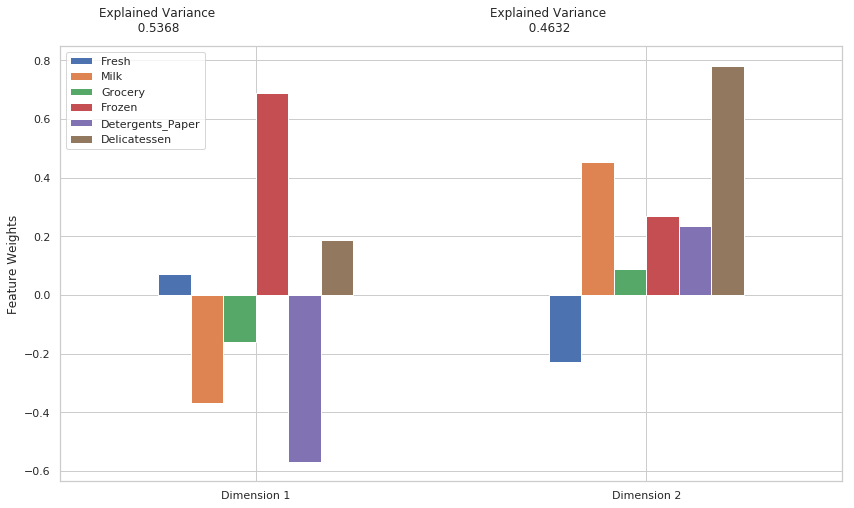

In [21]:
# TODO：通过在good data上进行PCA，将其转换成两个维度
pca = PCA(n_components = 2, whiten = True)

# TODO：使用上面训练的PCA将good data进行转换
reduced_data = pca.fit_transform(good_data)

# TODO：使用上面训练的PCA将log_samples进行转换
pca_samples = pca.fit_transform(log_samples)

# 为降维后的数据创建一个DataFrame
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
pca_results = vs.pca_results(good_data, pca)

降维后我们也可以再次观察数据在二维下的分布：
``` python
pd.scatter_matrix(reduced_data, alpha = 0.3, figsize = (10,6), diagonal = 'kde')
```
可以看出，第一维的分布与之前的milk, grocery, 和detergents_paper很接近。我们在之前观察到，这几个特征在第一个维度有很高的权重。

### 观察
运行以下代码观察当仅仅使用两个维度进行 PCA 转换后，这个对数样本数据将怎样变化。观察这里的结果与一个使用六个维度的 PCA 转换相比较时，前两维的数值是保持不变的。

问题：前两维改变了啊，为什么这里说没有改变？

In [22]:
# 展示经过两个维度的PCA转换之后的样本log-data
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.8597,-0.7708
1,-0.2377,1.1300
2,1.0974,-0.3591


## 可视化一个双标图（Biplot）
双标图是一个散点图，每个数据点的位置由它所在主成分的分数确定。坐标系是主成分（这里是 `Dimension 1` 和 `Dimension 2`）。此外，双标图还展示出初始特征在主成分上的投影。一个双标图可以帮助我们理解降维后的数据，发现主成分和初始特征之间的关系。

运行下面的代码来创建一个降维后数据的双标图。

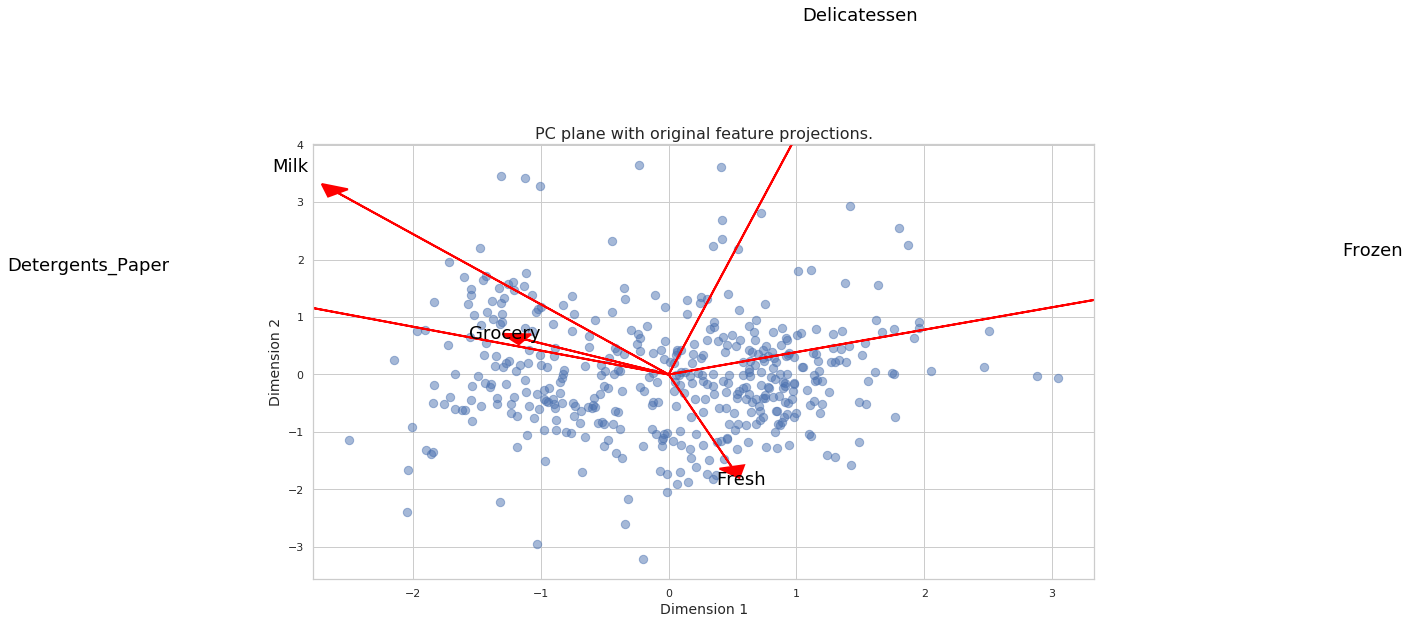

In [23]:
# 可视化双标图
vs.biplot(good_data, reduced_data, pca)

### 观察

一旦我们有了原始特征的投影（红色箭头），就能更加容易的理解散点图每个数据点的相对位置。

在这个双标图中，哪些初始特征与第一个主成分有强关联？哪些初始特征与第二个主成分相关联？你观察到的是否与之前得到的 pca_results 图相符？

**答**：Milk，Detergents_paper和Frozen与第一个主成份有强相关。Delicatessen与第二个主成份强相关。基本与之前的PCA_results相符

## 聚类

在这个部分，你讲选择使用 K-Means 聚类算法或者是高斯混合模型聚类算法以发现数据中隐藏的客户分类。然后，你将从簇中恢复一些特定的关键数据点，通过将它们转换回原始的维度和规模，从而理解他们的含义。

### 问题 6
使用 K-Means 聚类算法的优点是什么？使用高斯混合模型聚类算法的优点是什么？基于你现在对客户数据的观察结果，你选用了这两个算法中的哪一个，为什么？

**回答:** 

K-Means据类算法的优点
- 1.计算速度快
- 2.如果数据是球形或者团状的的，那么K-means的表现会比较好

高斯混合模型的优点
- 对于数据进行高斯分布建模，更符合现实数据分布的模式
- 使用后验概率进行计算，可以对特征权重大小进行建模

对于上述的数据，最好的建模是使用GMM，因为各个特征之间有很强的相关性，而K-means则假定各个特征对于形似度的计算贡献是一样的，所以GMM是比较合适的算法。

### 练习: 创建聚类

针对不同情况，有些问题你需要的聚类数目可能是已知的。但是在聚类数目不作为一个**先验**知道的情况下，我们并不能够保证某个聚类的数目对这个数据是最优的，因为我们对于数据的结构（如果存在的话）是不清楚的。但是，我们可以通过计算每一个簇中点的**轮廓系数**来衡量聚类的质量。数据点的[轮廓系数](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)衡量了它与分配给他的簇的相似度，这个值范围在-1（不相似）到1（相似）。**平均**轮廓系数为我们提供了一种简单地度量聚类质量的方法。

在接下来的代码单元中，你将实现下列功能：
 - 在 `reduced_data` 上使用一个聚类算法，并将结果赋值到 `clusterer`，需要设置  `random_state` 使得结果可以复现。
 - 使用 `clusterer.predict` 预测 `reduced_data` 中的每一个点的簇，并将结果赋值到 `preds`。
 - 使用算法的某个属性值找到聚类中心，并将它们赋值到 `centers`。
 - 预测 `pca_samples` 中的每一个样本点的类别并将结果赋值到 `sample_preds`。
 - 导入 `sklearn.metrics.silhouette_score` 包并计算 `reduced_data` 相对于 `preds` 的轮廓系数。
   - 将轮廓系数赋值给 `score` 并输出结果。

In [24]:
# TODO：在降维后的数据上使用你选择的聚类算法
from sklearn.metrics import silhouette_score
from sklearn import mixture
n_components = [2,3,4,5,6,7,8,9,10,11]
for n_component in n_components:
    gmm = mixture.GaussianMixture(n_components = n_component, random_state = 2, covariance_type='spherical')
    clusterer = gmm.fit(reduced_data)
# TODO：预测每一个点的簇
    preds = clusterer.predict(reduced_data)
# TODO：找到聚类中心
    centers = clusterer.means_
# TODO：预测在每一个转换后的样本点的类
    sample_preds = clusterer.predict(pca_samples)
# TODO：计算选择的类别的平均轮廓系数（mean silhouette coefficient）
    score = silhouette_score(reduced_data, preds) 
    print("The silhousette score of {} clusters is {}".format(n_component, score))

The silhousette score of 2 clusters is 0.3321279951275826
The silhousette score of 3 clusters is 0.35716829889776164
The silhousette score of 4 clusters is 0.3893720514131987
The silhousette score of 5 clusters is 0.36218166075898167
The silhousette score of 6 clusters is 0.31820587639455744
The silhousette score of 7 clusters is 0.35251320126677343
The silhousette score of 8 clusters is 0.35621710627163117
The silhousette score of 9 clusters is 0.35054535490962624
The silhousette score of 10 clusters is 0.34407596087918685
The silhousette score of 11 clusters is 0.327577963722882


对于边界的点，GMM的表现是很不错的。而对于那些在两个类的分界上的点，我们很难说它们确切的类属。这时候，GMM会更加有帮助，因为它会给出数据属于两类的概率, 对此你可以在进行聚类的时候使用`predict_proba` （代替之前的`predict`)。

参考:
Sklearn英文文档：
http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture.predict_proba

In [25]:
gmm = mixture.GaussianMixture(n_components = 4, random_state = 2, covariance_type='spherical')
clusterer = gmm.fit(reduced_data)
# TODO：预测每一个点的簇
preds = clusterer.predict(reduced_data)
# TODO：找到聚类中心
centers = clusterer.means_
# TODO：预测在每一个转换后的样本点的类
sample_preds = clusterer.predict(pca_samples)
# TODO：计算选择的类别的平均轮廓系数（mean silhouette coefficient）
score = silhouette_score(reduced_data, preds) 
print("The best silhousette score is 4 clusters with score of {}".format(score))

The best silhousette score is 4 clusters with score of 0.3893720514131987


### 问题 7

汇报你尝试的不同的聚类数对应的轮廓系数。在这些当中哪一个聚类的数目能够得到最佳的轮廓系数？

**回答:**
上面是我选择的聚类的数目从2到11，分别计算出了对应的轮廓系数。轮廓系数的范围从-1到1，-1表示完全没有聚类，0表示聚类重叠，1表示完美聚类。由此可以看出，轮廓系数越高，聚类效果越好。

综上所述：

这里面分数最高的是4个簇，得分为0.389。

做的很好。可以看到，当选用４个聚类中心的时候，可以得到最高的分数。从直觉上来说，这个项目的数据量很少，我们也不希望有太多的聚类数目, 因此，聚类数目为2是很合理的。

聚类数目的选择是一个很主观的问题。首先，最理想的情况是根据专业知识(domain knowledge)来决定最佳的聚类数目，比如说对于某个问题，我们很明确的清楚它的分类只有n种。遗憾的是，大多数时候我们并不知道这个最佳的聚类数目，这时候就只能通过各种指标来从数学角度选择一个聚类的数目了。

通常来说，聚类的指标和数据的分布方式以及我们选用的聚类算法都有关系。在这个项目中，我们使用的K-means或者GMM算法都是基于数据点与聚类中心的距离，因此轮廓系数是一个很合适的指标。除此之外，如果我们选择了GMM这个算法，还有其他更合适的指标，比如贝叶斯信息准则（Bayes information criterion）或者赤池信息量准则(Akaike information criterion)，对此你可以参考一下下面的两个链接。

参考（英文）：
http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html#example-mixture-plot-gmm-selection-py

http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

除了Sklearn文档，在知乎上有一篇很好的文章，总结了聚类的评价办法：
https://zhuanlan.zhihu.com/p/24546995

### 聚类可视化
一旦你选好了通过上面的评价函数得到的算法的最佳聚类数目，你就能够通过使用下面的代码块可视化来得到的结果。作为实验，你可以试着调整你的聚类算法的聚类的数量来看一下不同的可视化结果。但是你提供的最终的可视化图像必须和你选择的最优聚类数目一致。

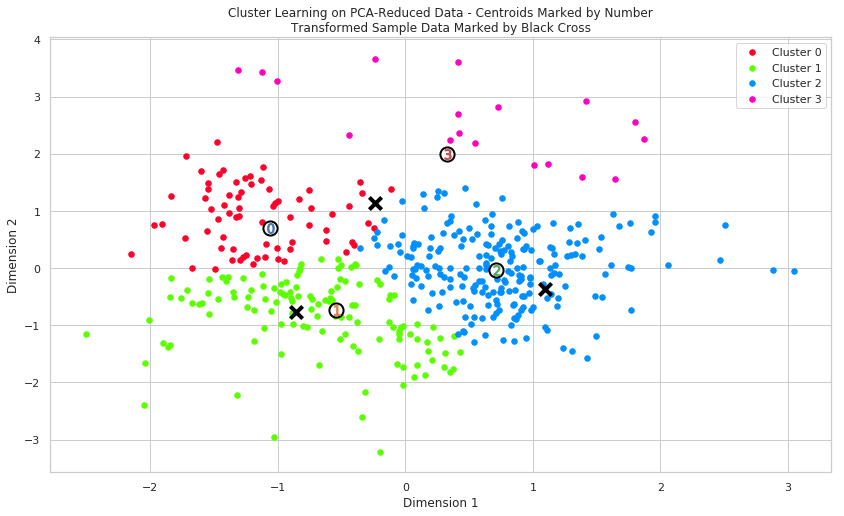

In [26]:
# 从已有的实现中展示聚类的结果
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### 练习: 数据恢复
上面的可视化图像中提供的每一个聚类都有一个中心点。这些中心（或者叫平均点）并不是数据中真实存在的点，但是是所有预测在这个簇中的数据点的平均。对于创建客户分类的问题，一个簇的中心对应于那个分类的平均用户。因为这个数据现在进行了降维并缩放到一定的范围，我们可以通过施加一个反向的转换恢复这个点所代表的用户的花费。

在下面的代码单元中，你将实现下列的功能：
 - 使用 `pca.inverse_transform` 将 `centers` 反向转换，并将结果存储在 `log_centers` 中。
 - 使用 `np.log` 的反函数 `np.exp` 反向转换 `log_centers` 并将结果存储到 `true_centers` 中。


In [27]:
# TODO：反向转换中心点
log_centers = pca.inverse_transform(centers)

# TODO：对中心点做指数转换
true_centers = np.exp(log_centers)

# 显示真实的中心点
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,6741.0,11011.0,9148.0,722.0,6853.0,3424.0
Segment 1,12473.0,2657.0,6398.0,718.0,2306.0,630.0
Segment 2,11174.0,1966.0,4943.0,4587.0,852.0,2380.0
Segment 3,4899.0,11641.0,7417.0,7051.0,2795.0,29034.0


### 问题 8
考虑上面的代表性数据点在每一个产品类型的花费总数，你认为这些客户分类代表了哪类客户？为什么？需要参考在项目最开始得到的统计值来给出理由。

**提示：** 一个被分到`'Cluster X'`的客户最好被用 `'Segment X'`中的特征集来标识的企业类型表示。

In [28]:
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**回答:**
- Segment0 Milk，Detergents_paper，Delicatessen的进货量大于75%，Grocery大于50%，Frozen和Fresh则低于50%。由此可以分析出，这个客户比较倾向于咖啡店，因为咖啡店牛奶消耗的比较多，清洁纸使用的也多，熟食产品作为咖啡店的小吃也必不可少。而咖啡店，不太需要冷冻食品和日用品，所以我认为这个簇属于咖啡店。

- Segment1 只有Fresh和Detergents_Paper远远多于50%，其它的商品要么在50%左右，要么少于50%，所以这个应该是卖新鲜食物的商店。

- Segment2 Frozen和Delicatessen多于75%，其余都在50%左右，所以这个应该是超市

- Segment3 Frozen和Delicatessen远远多于75%,其余和Segment0类似，Fresh稍微多于25%，由此推断这个商户是零售商，因为零售商不太需要新鲜食品。

由此推断：
- Segment0: 咖啡店
- Segment1: 其他
- Segment2: 超市
- Segment3：零售商

### 问题 9
对于每一个样本点**问题 8 **中的哪一个分类能够最好的表示它？你之前对样本的预测和现在的结果相符吗？

运行下面的代码单元以找到每一个样本点被预测到哪一个簇中去。

In [29]:
# 显示预测结果
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 2


**回答:**
>- 第一家企业购买的Fresh为和Detegents_Paper比较多且数据大于50%的数值，Frozen和Deli比较少，其中Frozen低于25%，Deli低于50%的数据，所以这个客户不会是超市、零售商或咖啡馆，最有可能的是其他，原因如下：
  - 熟食是超市销售的主力商品之一，不会太少（大于50%），不是超市
  - 零售商一般购买大致相当数量的物品，各个商品数量不会较平均值相差太大，不会是零售商
  - 咖啡馆一般需要很多牛奶和清洁纸，和熟食，不会是咖啡馆
- 第二家企业，所有商品都购买的比较平均且数量颇多，Fresh小于50%的数据，Frozen和Detergents_Paper多于50%的数据，Grocery、Milk和Delicatessen大于75%的数据，比较可能是零售商，原因如下：
  - 新鲜食物太少，不是超市
  - 冷冻食品太多，日用杂货太多，不是咖啡馆
- 第三家企业，新鲜食品购买的最多，多于50%，但是清洁纸买的非常少少于50%，很有可能是超市，原因如下：
  - 清洁纸太少，不会是咖啡店
  - 新鲜食品太多，零售商不会这么囤货，不是零售商
  
以上是我之前的回答：

结合预测：

    |    | 分析  |  预测      |
    | ---| -----| --------   |
    | 1  | 其他  |   其它     |
    | 2  | 零售商|   咖啡店    |
    | 3  | 超市  |   超市     |

基本与我分析的相同.

## 结论

在最后一部分中，你要学习如何使用已经被分类的数据。首先，你要考虑不同组的客户**客户分类**，针对不同的派送策略受到的影响会有什么不同。其次，你要考虑到，每一个客户都被打上了标签（客户属于哪一个分类）可以给客户数据提供一个多一个特征。最后，你会把客户分类与一个数据中的隐藏变量做比较，看一下这个分类是否辨识了特定的关系。

### 问题 10
在对他们的服务或者是产品做细微的改变的时候，公司经常会使用 [A/B tests ](https://en.wikipedia.org/wiki/A/B_testing)以确定这些改变会对客户产生积极作用还是消极作用。这个批发商希望考虑将他的派送服务从每周5天变为每周3天，但是他只会对他客户当中对此有积极反馈的客户采用。这个批发商应该如何利用客户分类来知道哪些客户对它的这个派送策略的改变有积极的反馈，如果有的话？你需要给出在这个情形下A/B 测试具体的实现方法，以及最终得出结论的依据是什么？

**提示：** 我们能假设这个改变对所有的客户影响都一致吗？我们怎样才能够确定它对于哪个类型的客户影响最大？

**回答：** 
- a. 把之前分好的三类客户，按照类别随随机分成两组，一组实验组，一组对照组。
- b. 对于实验组采用3天派送服务，对于对照组采用五天服务。
- c. 收集实验数据，可以采取调查表的方式，做回访。
- d. 对比数据，计算每个类别中，对比实验组(三天派送）和对照组(五天派送）客户的满意度和出货量对比。
- e. 分析各个类别中实验组和对照组的满意度和出货量，在对比各个类别中实验组的满意率和出货量百分比，就可以得出哪个类别的客户比较喜欢新的配送方式，新的出货方式的积极回应占多少比例。

很好，分别在各个聚类中进行A/B test 是很好的策略．

作为拓展，你可以看看这些A/B test 案例:
https://vwo.com/blog/10-kickass-ab-testing-case-studies/

### 问题 11
在使用聚类技巧时，我们从原始无标签数据中得出了额外的结构。因为每个客户都属于某个最合适的***客户细分***（取决于应用的聚类算法），我们可以将*”客户细分“*看作数据的**工程化特征**。假设批发商最近吸引了 10 个新的客户，每个客户都能为每个产品类别带来预期的年收入（估值）。了解这些估值后，批发商希望将每个新客户归类到一个***客户细分***，以确定最合适的送货服务。 
* 批发商如何仅使用估计的产品开支和**客户细分**数据为新客户设定标签？

**提示：**可以使用监督式学习器对原始客户进行训练。目标变量可以是什么？

**回答：**
使用监督学习对原始客户进行训练，训练的数据使用原始商品的出货量，对应相应的客户细分。这样通过出货量就可以确定客户的类别，确定出货量后，就可以计算出相应的估值，这些估值就可以用来对性的客户进行细分。如果新客户可以给出，具体每个类倍商品的订货量的话，就可以对新客户进行比较具体准确地设定标签。

### 可视化内在的分布

在这个项目的开始，我们讨论了从数据集中移除 `'Channel'` 和 `'Region'` 特征，这样在分析过程中我们就会着重分析用户产品类别。通过重新引入 `Channel` 这个特征到数据集中，并施加和原来数据集同样的 PCA 变换的时候我们将能够发现数据集产生一个有趣的结构。

运行下面的代码单元以查看哪一个数据点在降维的空间中被标记为 `'HoReCa'` (旅馆/餐馆/咖啡厅)或者 `'Retail'`。另外，你将发现样本点在图中被圈了出来，用以显示他们的标签。

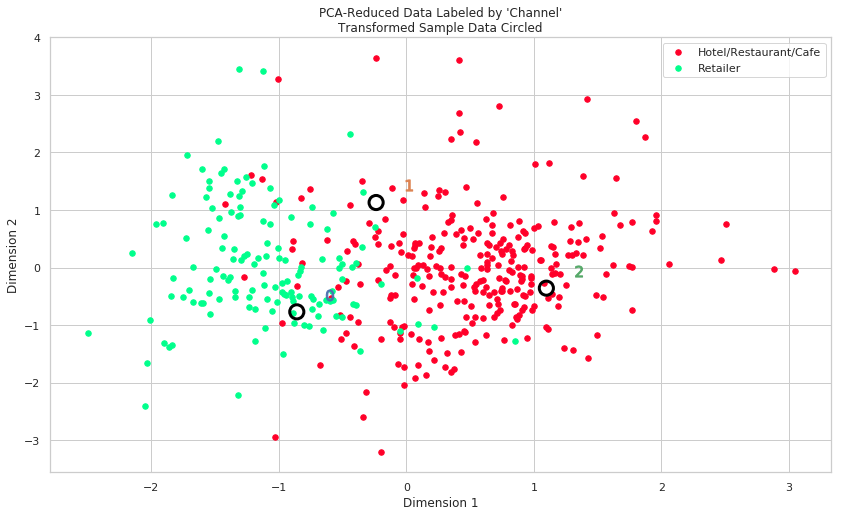

In [30]:
# 根据‘Channel‘数据显示聚类的结果
vs.channel_results(reduced_data, outliers, pca_samples)

### 问题 12

你选择的聚类算法和聚类点的数目，与内在的旅馆/餐馆/咖啡店和零售商的分布相比，有足够好吗？根据这个分布有没有哪个簇能够刚好划分成'零售商'或者是'旅馆/饭店/咖啡馆'？你觉得这个分类和前面你对于用户分类的定义是一致的吗？

**回答：**

我选择的聚类数目是4，与内在的分布相比，我的选择要更好，理由如下：
- 内在分类中，特征的数目太少,导致特征交叉比较多，不利于分类

根据这个划分，簇0和簇2分别被划分成了'零售商'或者是'旅馆/饭店/咖啡馆'。

这个分类和我的定义有交叉的地方，我通过划分成簇来分类，比内在分类更加细致，便于做用户的精准定位。

<IPython.core.display.Javascript object>


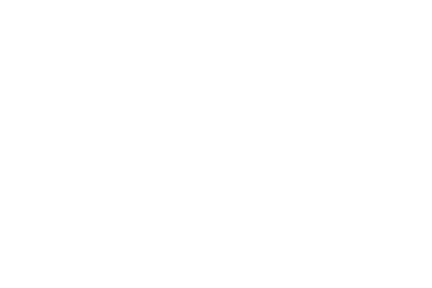

<IPython.core.display.Javascript object>


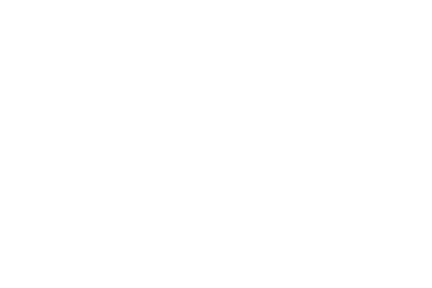

In [32]:
% matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# use a 3-component PCA
reduced_data3 = PCA(n_components=3).fit_transform(good_data)
reduced_data3 = pd.DataFrame(reduced_data3, 
                columns = ['Dimension 1', 'Dimension 2', 'Dimension 3'])

# get the labels
channel = pd.read_csv("customers.csv")['Channel']
channel = channel.drop(channel.index[outliers]).reset_index(drop = True)
labeled = pd.concat([reduced_data3, channel], axis = 1)
labels = ['Hotel/Restaurant/Cafe', 'Retailer']

# group by labels
grouped = labeled.groupby('Channel')

# color stuff 
cmap = cm.get_cmap('gist_rainbow')

# let's plot!
fig = plt.figure()
axe3d = fig.gca(projection = '3d')
for i, data3 in grouped:
    axe3d.scatter(data3.iloc[:,0],data3.iloc[:,1],data3.iloc[:,2],
                  c = cmap((i-1)*1.0/2),label = labels[int(i)-1], linewidth = 0)

# ajust for sanity
axe3d.set_xlabel('Dimension 1')
axe3d.set_ylabel('Dimension 2')
axe3d.set_zlabel('Dimension 3')
axe3d.set_xlim(labeled.iloc[:,0].min(),labeled.iloc[:,0].max())
axe3d.set_ylim(labeled.iloc[:,1].min(),labeled.iloc[:,1].max())
axe3d.set_zlim(labeled.iloc[:,2].min(),labeled.iloc[:,2].max())   
axe3d.legend()
plt.show()

参考: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

> **注意**: 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)**把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。  